In [3]:
%pylab
%matplotlib inline
import numpy as np

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


operation time is : 0.09761655728022257 min


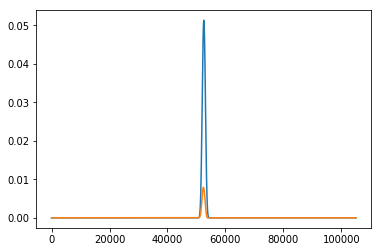

In [38]:
import time 
time_start=time.time()
dt = 0.6
w0 = 0.057
w1 = 0.114
Up0 = 0.5 + 3.17 * 0.08 **2 /(4 * w0**2)
N=40
T_100=0.0151992
THG_x=[]
THG_y=[]
FHG_x=[]
FHG_y=[]

for i in range(N):   
    path='./HHG_%d.dat' % i
    data = loadtxt(path)
    time, Dx, Dy = data [:, 0],  data[:, 5], data[:, 6]

    #w = 2* pi* fft.fftfreq(len(time), dt)
    Dx_1=zeros(Dx.size)
    Dy_1=zeros(Dy.size)
    Dx_1[Dx.size-1]=((Dx[Dx.size-1]-Dx[Dx.size-2])/dt)
    Dy_1[Dy.size-1]=((Dy[Dy.size-1]-Dy[Dy.size-2])/dt)
    for m in range(Dx.size-1):
        Dx_1[m]=((Dx[m+1]-Dx[m])/dt)
        Dy_1[m]=((Dy[m+1]-Dy[m])/dt)

    Dx_2=zeros(Dx.size)
    Dy_2=zeros(Dy.size)
    Dx_2[Dx.size-1]=((Dx_1[Dx.size-1]-Dx_1[Dx.size-2])/dt)
    Dy_2[Dy.size-1]=((Dy_1[Dy.size-1]-Dy_1[Dy.size-2])/dt)
    for n in range(Dx.size-1):
        Dx_2[n]=((Dx_1[n+1]-Dx_1[n])/dt)
        Dy_2[n]=((Dy_1[n+1]-Dy_1[n])/dt)

    mul=10*Dx.size
    Dx_ext=np.pad(Dx, (mul, mul), 'constant')
    Dy_ext=np.pad(Dy, (mul, mul), 'constant')
    time_ext=linspace(-(mul+0.5)*len(time)*dt,(mul+0.5)*len(time)*dt,Dy_ext.size)
    fre_x = fft.fft(2 * Dx_ext)
    fre_y = fft.fft(2 * Dy_ext)
    #傅里叶变换后，取其低频部分（100THz：0.0151992以下）
    Dx_thz = zeros(Dx_ext.size, complex)
    Dy_thz = zeros(Dy_ext.size, complex)
    con_1=int(T_100/(2*pi*(1/(len(time_ext)*dt)))+1)
    con_2=int(T_100/(2*pi*(1/(len(time_ext)*dt))))
    Dx_thz[0:con_1]=fre_x[0:con_1]
    Dy_thz[0:con_1]=fre_y[0:con_1]
    Dx_thz[(Dx_ext.size-con_2):Dx_ext.size]=fre_x[(Dx_ext.size-con_2):Dx_ext.size]
    Dy_thz[(Dx_ext.size-con_2):Dx_ext.size]=fre_y[(Dx_ext.size-con_2):Dx_ext.size]

    tds_x = ifft(Dx_thz)
    tds_y = ifft(Dy_thz)
    if abs(max(tds_x)) > abs(min(tds_x)):
        THG_x.append(max(tds_x))
    if abs(max(tds_x)) < abs(min(tds_x)):
        THG_x.append(min(tds_x))
    if abs(max(tds_y)) > abs(min(tds_y)):
        THG_y.append(max((tds_y)))
    if abs(max(tds_y)) < abs(min(tds_y)):
        THG_y.append(min((tds_y)))
plot(tds_x)
plot(tds_y)
# savetxt('Datasave/THG_x.txt',THG_x)
# savetxt('Datasave/THG_y.txt',THG_y)
import time
time_end=time.time()
print ('operation time is :',(time_end-time_start)/60, 'min')

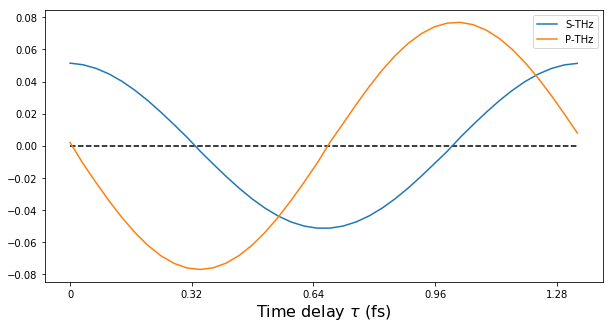

In [83]:
import matplotlib.pyplot as plt
figure(figsize=(10,5))
# subplot(121)
Size = 16
nofont = {'fontname':'Times New Roman'}
chfont = {'fontname':'Arial'}
ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'))
xlabel(r"Time delay $\tau $ (fs)",size=Size)
hlines(0,0,1.334,color='k',linestyles = "dashed")
plot(np.linspace(0,1.334,40),(THG_x),label='S-THz')
plot(np.linspace(0,1.334,40),(THG_y),label='P-THz')
legend()
savefig()
# subplot(122)
# plot(FHG_x)
# plot(FHG_y)

572
0.6006993006993007


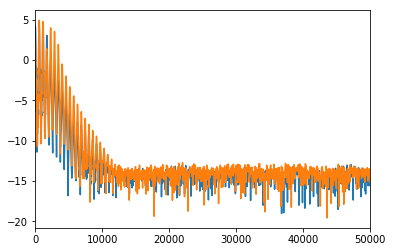

In [9]:
plot(log(abs(frex)))
plot(log(abs(frey)))
xlim(0,50000)
# axvline(1718)
# axvline(2860)
print(argmax(abs(frey)[0:3000]))
print(1718/2860)

572
0.6006993006993007


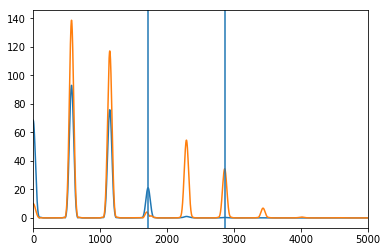

In [10]:
plot(abs(frex))
plot(abs(frey))
xlim(0,5000)
axvline(1718)
axvline(2860)
print(argmax(abs(frey)[0:3000]))
print(1718/2860)

572
0.6006993006993007


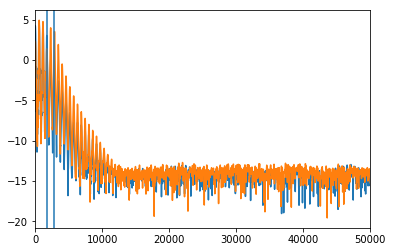

In [11]:
plot(log(abs(frex)))
plot(log(abs(frey)))
xlim(0,50000)
axvline(1718)
axvline(2860)
print(argmax(abs(frey)[0:3000]))
print(1718/2860)

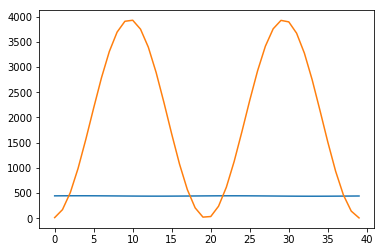

In [15]:
plot(THG_x)
plot(THG_y)

/home/chris/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


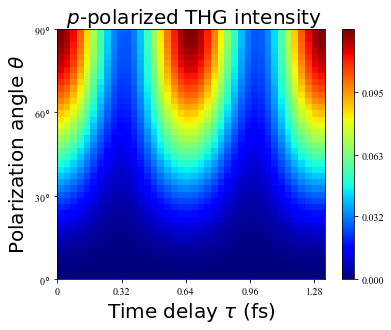

In [6]:
Size=20
# THG_x=loadtxt('Datasave/THG_x.txt')
# THG_y=loadtxt('Datasave/THG_y.txt')
figsize(6,4.59)
extent=[0,1.334,0,90]
imshow(THG_x/amax(THG_y),extent=extent,cmap="jet", aspect='auto',origin='lower')
nofont = {'fontname':'Times New Roman'}
chfont = {'fontname':'Arial'}

title(' $p$-polarized THG intensity',size=Size,**chfont)
#clim(0,0.4)
cb=colorbar()
cb.set_ticks(around(linspace(0,amax(THG_x)/amax(THG_y),5),decimals=3))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")


matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)

xlabel(r"Time delay $\tau $ (fs)",size=Size,**chfont)
ylabel(r'Polarization angle $\theta$',size=Size,**chfont)
# savefig('Figsave/THG-X',dpi=512, bbox_inches='tight')
savefig('Figsave/THG-X.pdf',dpi=512, bbox_inches='tight')

/home/chris/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


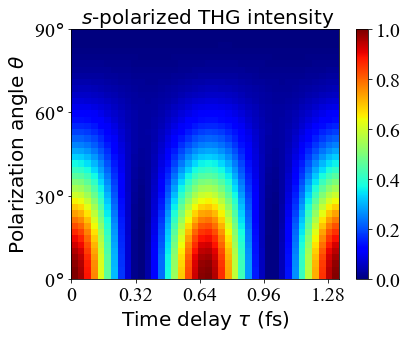

In [7]:
Size=20
figsize(6,4.59)
extent=[0,1.334,0,90]
imshow(THG_y/amax(THG_y),extent=extent,cmap="jet",aspect='auto',origin='lower')

nofont = {'fontname':'Times New Roman'}
chfont = {'fontname':'Arial'}

cb=colorbar()
cb.set_ticks(linspace(0.,1.,6))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

title(' $s$-polarized THG intensity',size=Size,**chfont)
clim(0,1)

matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)

xlabel(r"Time delay $\tau $ (fs)",size=Size,**chfont)
ylabel(r'Polarization angle $\theta$',size=Size,**chfont)
# savefig('Figsave/THG-Y',dpi=512, bbox_inches='tight')
savefig('Figsave/THG-Y.pdf',dpi=512, bbox_inches='tight')

Text(0,0.5,'Polarization angle $\\theta$')

/home/chris/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


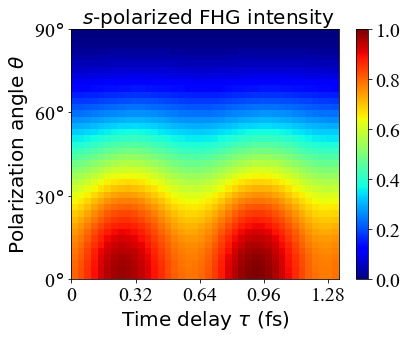

In [8]:
figsize(6,4.59)
extent=[0,1.334,0,90]
imshow(FHG_y/amax(FHG_y),extent=extent,cmap="jet",aspect='auto',origin='lower')

nofont = {'fontname':'Times New Roman'}
chfont = {'fontname':'Arial'}

cb=colorbar()
cb.set_ticks(linspace(0.,1.,6))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

title(' $s$-polarized FHG intensity',size=Size,**chfont)
clim(0,1)

matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)

xlabel(r"Time delay $\tau $ (fs)",size=Size,**chfont)
ylabel(r'Polarization angle $\theta$',size=Size,**chfont)

Text(0,0.5,'Polarization angle $\\theta$')

/home/chris/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


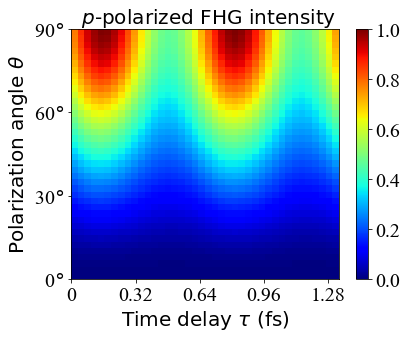

In [9]:
figsize(6,4.59)
extent=[0,1.334,0,90]
imshow(FHG_x/amax(FHG_x),extent=extent,cmap="jet",aspect='auto',origin='lower')

nofont = {'fontname':'Times New Roman'}
chfont = {'fontname':'Arial'}

cb=colorbar()
cb.set_ticks(linspace(0.,1.,6))
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

title(' $p$-polarized FHG intensity',size=Size,**chfont)
clim(0,1)

matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)

ax=plt.gca()
Xscale=around(arange(0,1.334,0.32),decimals=2)
ax.set_xticks(Xscale)
ax.set_xticklabels(('0','0.32','0.64','0.96','1.28'),**nofont)
Yscale=linspace(0,90,4)
ax.set_yticks(Yscale)
ax.set_yticklabels(('0$\degree$','30$\degree$','60$\degree$','90$\degree$'),**nofont)

xlabel(r"Time delay $\tau $ (fs)",size=Size,**chfont)
ylabel(r'Polarization angle $\theta$',size=Size,**chfont)